In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from datetime import date
from sklearn.impute import KNNImputer

# Tasca M3 T02

Los datos que se van a estudiar a continuación proceden de la Oficina de Estadísticas de Transporte (BTS) del Departamento de Transporte de EE.UU. (DOT). Este conjunto contiene 1 936 758 vuelos nacionales en EE.UU. realizados en el año 2008. Además, sus causas de retraso, desvío, cancelación, etc.

## Ejercicio 1
Descargue el dataset *Airlines Delay: Airline donde-time statistics and delay causas* y cárguelo a un Pandas Dataframe. Explore los datos que contiene, explique brevemente qué variables hay y quédese únicamente con las columnas que considere relevantes. Justifique su elección.

### Importante

Reduzca la dimensión del dataset de manera aleatoria para obtener un dataset de solo 200.000 registros. Todos los ejercicios se tienen que hacer con este dataset reducido.

## Solución

1. Lerr el data set DelayedFlights.csv.

In [2]:
df_flights=pd.read_csv('DelayedFlights.csv')

2. Reducir dataframe a 200000 registros con el método **sample()**

In [83]:
np.random.seed(7)
df=df_flights.sample(n=200000)
df.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
262773,836102,2008,2,10,7,2146.0,2140,2317.0,2314,UA,...,6.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
612441,1930476,2008,4,17,4,1413.0,1346,1503.0,1435,YV,...,3.0,21.0,0,N,0,28.0,0.0,0.0,0.0,0.0
589522,1840102,2008,4,18,5,1251.0,1240,1510.0,1500,WN,...,3.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1160489,3869768,2008,7,27,7,2225.0,1904,202.0,2244,UA,...,4.0,29.0,0,N,0,0.0,54.0,0.0,0.0,144.0
1437292,4893941,2008,9,18,4,2114.0,2105,2143.0,2140,WN,...,4.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN


* Primero haremos una tabla para organizar nuestras variables.

$$
\begin{aligned}
& \text {Información de Fechas }\\
&\begin{array}{|l|r|}
 \hline\text{Year } & \text { Año}\\
 \hline\text{Month } & \text {  Mes }\\
 \hline\text{DayofMonth } & \text { Día del mes }\\
 \hline\text{DayofWeek } & \text { Día de la semana }\\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Información de Salida / minutos }\\
&\begin{array}{|l|r|}
 \hline\text{DepTime } & \text { Hora de salia }\\
 \hline\text{CRSDepTime } & \text { Hora de salida programada }\\
 \hline\text{TaxiOut} & \text { Tiempo desde que el avión está rodando hasta que sale de pista}\\
  \hline\text{DepDelay } & \text { Retraso de salida }\\
 \hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Información de Llegada / minutos}\\
&\begin{array}{|l|r|}
 \hline\text{ArrTime } & \text { Hora de llegada }\\
 \hline\text{CRSArrTime } & \text { Hora de llegada programada }\\
 \hline\text{TaxiIn } & \text {Tiempo desde que el avión aterriza hasta que llega a Gate }\\
 \hline\text{ArrDelay } & \text { Retraso de llegada }\\
 \hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Información Aerolínea}\\
&\begin{array}{|l|r|}
 \hline\text{UniqueCarrier } & \text { Código único de la compañía aérea }\\
 \hline\text{FlightNum } & \text { Número de vuelo }\\
 \hline\text{TailNum } & \text { Número de cola de la aeronave }\\
 \hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Causa de los retrasos}\\
&\begin{array}{|l|r|}
\hline\text{Diverted } & \text {Desviado }\\
\hline\text{CarrierDelay} & \text { Retraso a causa de la aerolínea }\\
\hline\text{WeatherDelay} & \text { Retraso meteorológico }\\
\hline\text{NASDelay} & \text { Retraso a causa del Sistema Aéreo Nacional}\\
\hline\text{SecurityDelay} & \text { Retraso de seguridad}\\
\hline\text{LateAircraftDelay} & \text { Retraso del avión}\\
\hline
\end{array}
\end{aligned}
$$

$$
\begin{aligned}
& \text {Otros Datos}\\
&\begin{array}{|l|r|}
 \hline\text{ActualElapsedTime } & \text { Tiempo real de vuelo }\\
 \hline\text{CRSElapsedTime } & \text { Tiempo de vuelo programado }\\
 \hline\text{AirTime } & \text { Tiempo de vuelo }\\
 \hline\text{Origin } & \text { Origen }\\
\hline\text{Dest } & \text { Destino }\\
\hline\text{Distance } & \text { Distancia }\\
\hline\text{Cancelled} & \text { Cancelado}\\
\hline\text{CancellationCode} & \text {Código de cancelación }\\
\hline
\end{array}
\end{aligned}
$$

3. Con el método **.info()** de la libreria pandas, mostraremos un resumen de nuestro dataframe, incluyendo información sobre el tipo de los índices de filas y columnas, los valores no nulos y la memoria usada.

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 262773 to 856058
Data columns (total 30 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   Year               200000 non-null  int64  
 2   Month              200000 non-null  int64  
 3   DayofMonth         200000 non-null  int64  
 4   DayOfWeek          200000 non-null  int64  
 5   DepTime            200000 non-null  float64
 6   CRSDepTime         200000 non-null  int64  
 7   ArrTime            199224 non-null  float64
 8   CRSArrTime         200000 non-null  int64  
 9   UniqueCarrier      200000 non-null  object 
 10  FlightNum          200000 non-null  int64  
 11  TailNum            200000 non-null  object 
 12  ActualElapsedTime  199088 non-null  float64
 13  CRSElapsedTime     199979 non-null  float64
 14  AirTime            199088 non-null  float64
 15  ArrDelay           199088 non-null  float64
 1

In [84]:
print('Cancelados',df['Cancelled'].unique())
print('Desviados',df['Diverted'].unique())

Cancelados [0 1]
Desviados [0 1]


* La columna **Cancelled** consta de **0** si el vuelo no ha sido cancelado y **1** caso contrario. Con está variable se puede investigar por ejemplo, el número de vuelos cancelados en el año 2008, vuelos cancelados por compañia....Un razonamiento similar podemos realizar con la columna **Diverted** (vuelos desviados).

* Podeemos prescindir de las siguientes variables:
 
   * **Unnamed: 0**, no aporta nigún tipo de información, si quremos identificar un vuelo lo podemos hacer con la columna **FlightNum** (número de vuelo) la cual tiene un ID único.

   * **TailNum**, el número de cola es irrevante para nuestro estudio

4. Eliminar variables irrelevantes.

In [85]:
df.drop(['Unnamed: 0','TailNum'],axis=1, inplace=True)
df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
262773,2008,2,10,7,2146.0,2140,2317.0,2314,UA,898,...,6.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
612441,2008,4,17,4,1413.0,1346,1503.0,1435,YV,7307,...,3.0,21.0,0,N,0,28.0,0.0,0.0,0.0,0.0
589522,2008,4,18,5,1251.0,1240,1510.0,1500,WN,387,...,3.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1160489,2008,7,27,7,2225.0,1904,202.0,2244,UA,1568,...,4.0,29.0,0,N,0,0.0,54.0,0.0,0.0,144.0
1437292,2008,9,18,4,2114.0,2105,2143.0,2140,WN,496,...,4.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN


## Ejercicio 2
Haga un informe completo del dataset:
* Resuma estadísticamente el dataset y las columnas de interés. Haga un análisis estadístico de lo que considere relevante.
* Encuentre cuántos datos faltantes hay por columna.
* Cree columnas nuevas (velocidad mediana del vuelo, si ha llegado tarde o no...).
* Haga una tabla de las aerolíneas con más atrasos acumulados.
* Cuáles son los vuelos más largos? Y los más atrasados? Busque las rutas más largas y las que acumulan más retrasos.
* Aporte aquello que considere relevante.

## Solución

1. Resuma estadísticamente el dataset y las columnas de interés. Haga un análisis estadístico del que considere relevante.

In [86]:
df.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,200000.0,200000.00,200000.00,200000.00,200000.00,200000.00,199224.00,200000.00,200000.00,199088.00,...,200000.00,199224.00,199959.00,200000.00,200000.00,128776.00,128776.00,128776.00,128776.00,128776.00
mean,2008.0,6.10,15.73,3.97,1519.18,1468.34,1609.49,1633.86,2179.69,133.32,...,764.88,6.82,18.28,0.00,0.00,19.09,3.69,15.23,0.09,25.21
std,0.0,3.48,8.78,2.00,450.02,424.04,548.98,465.18,1942.48,72.26,...,575.14,5.30,14.43,0.02,0.06,43.34,21.60,34.59,2.07,41.91
min,2008.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,16.00,...,24.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1204.00,1135.00,1316.00,1325.00,608.00,80.00,...,337.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1545.00,1510.00,1715.00,1706.00,1538.00,116.00,...,606.00,6.00,14.00,0.00,0.00,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1900.00,1815.00,2031.00,2014.00,3419.00,165.00,...,998.00,8.00,21.00,0.00,0.00,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2400.00,9740.00,683.00,...,4962.00,189.00,376.00,1.00,1.00,1707.00,1297.00,1357.00,254.00,805.00


* Las variables relevates que podemos considerar son aquellas que están cuatificadas. Por ejemplo, la hora de salida y llegada está representada en formato NASA, los retrasos en minutos, la distancia entre ciudades en millas. Por lo tanto, si quisieramos estudiar los retrasos que ocurren en los aeropuertos y aerolíneas, las columas que contienen estos valores serán muy importantes para desarrollar modelos de predicción.  

2. Encuentre cuántos datos faltantes hay por columna.

In [87]:
df.isnull().sum()


Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime                  0
CRSDepTime               0
ArrTime                776
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
ActualElapsedTime      912
CRSElapsedTime          21
AirTime                912
ArrDelay               912
DepDelay                 0
Origin                   0
Dest                     0
Distance                 0
TaxiIn                 776
TaxiOut                 41
Cancelled                0
CancellationCode         0
Diverted                 0
CarrierDelay         71224
WeatherDelay         71224
NASDelay             71224
SecurityDelay        71224
LateAircraftDelay    71224
dtype: int64

* Identificamos los valores faltantes visualmente

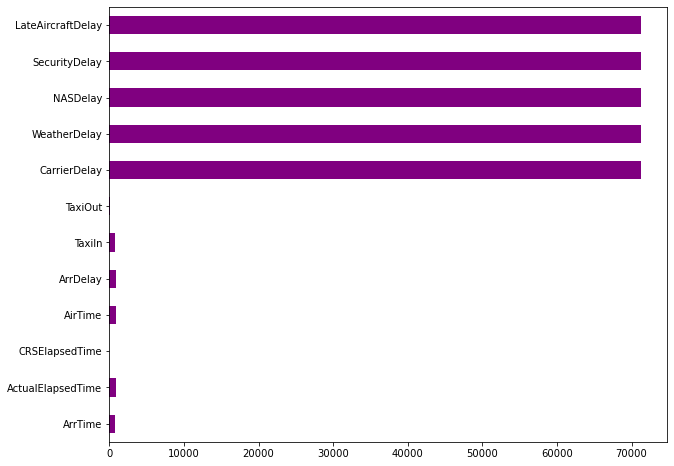

In [88]:
df.isna().sum()[df.isna().sum()>0].plot(kind='barh',figsize=(10,8),color='purple');

* Observar la estadística de la variables con valores faltantes

In [89]:
# crear lista vacía para almacenar columnas con valores faltantes
missing_values=[]
# crear objeto con nombre de columnas y la suma de sus valores no nulos
obj = df.isnull().sum()
# iterar sobre clave y valor del objeto
for key,value in obj.iteritems():
    # si valor de la suma es > 0, entonces añadimos la colunma (key) a la lista
    if(value>0):
        missing_values.append(key)
# Imprimir estadística de la columnas con la suma de valores faltantes > 0        
df[missing_values].describe().round(2)     

,ArrTime,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,199224.00,199088.00,199979.00,199088.00,199088.00,199224.00,199959.00,128776.00,128776.00,128776.00,128776.00,128776.00
mean,1609.49,133.32,134.26,108.23,42.20,6.82,18.28,19.09,3.69,15.23,0.09,25.21
std,548.98,72.26,71.46,68.78,56.92,5.30,14.43,43.34,21.60,34.59,2.07,41.91
min,1.00,16.00,1.00,5.00,-67.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,1316.00,80.00,81.00,58.00,9.00,4.00,10.00,0.00,0.00,0.00,0.00,0.00
50%,1715.00,116.00,116.00,90.00,24.00,6.00,14.00,2.00,0.00,2.00,0.00,8.00
75%,2031.00,165.00,165.00,137.00,56.00,8.00,21.00,21.00,0.00,15.00,0.00,33.00
max,2400.00,683.00,660.00,654.00,1707.00,189.00,376.00,1707.00,1297.00,1357.00,254.00,805.00


* Interpolar valores faltantes (NaN) con método **interpolate()**.

In [90]:
df[missing_values]=df[missing_values].interpolate(method='linear', limit_direction='both', axis=0)

* Volver a verificar valores faltantes

In [91]:
df.isnull().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

3. Cree columnas nuevas (velocidad mediana del vuelo, si ha llegado tarde o no...).

* Crear la columna velocidad media de vuelo.

In [92]:
df[['Distance','ActualElapsedTime']].head()

,Distance,ActualElapsedTime
262773,413,91.0
612441,116,50.0
589522,484,79.0
1160489,1012,157.0
1437292,528,89.0


Recordar que los valores de la colunma Distance están expresados por millas y los de la columna  ActualElapsedTime en minutos.

In [93]:
# multiplicar x 60 para convertir minutos es horas
df['Average_velocity']=60*(df['Distance'])/df['ActualElapsedTime']
# la velocidad se expresa en millas X hora.
df.head(5)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_velocity
262773,2008,2,10,7,2146.0,2140,2317.0,2314,UA,898,...,13.0,0,N,0,28.0,0.0,0.0,0.0,0.0,272.307692
612441,2008,4,17,4,1413.0,1346,1503.0,1435,YV,7307,...,21.0,0,N,0,28.0,0.0,0.0,0.0,0.0,139.200000
589522,2008,4,18,5,1251.0,1240,1510.0,1500,WN,387,...,8.0,0,N,0,14.0,27.0,0.0,0.0,72.0,367.594937
1160489,2008,7,27,7,2225.0,1904,202.0,2244,UA,1568,...,29.0,0,N,0,0.0,54.0,0.0,0.0,144.0,386.751592
1437292,2008,9,18,4,2114.0,2105,2143.0,2140,WN,496,...,9.0,0,N,0,14.0,27.0,3.5,0.0,72.0,355.955056


* Crear la columna si llega tarde o no. Asignaremos el valor **1** si llega tarde y **0** caso contrario.

In [94]:
def ArrLate(x):
    if (x>0):
        return 1
    else:
        return 0

In [95]:
df['ArrLate']=df['ArrDelay'].map(ArrLate);
print('Valores únicos ',df['ArrLate'].unique())
df_flights.head(5)

Valores únicos  [1 0]


,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


4. Haga una tabla de las aerolíneas con más atrasos acumulados.

* Creamos la columna con **delay_total** (retraso acumulado) que es la suma del retraso de la salida (DepDelay) más retraso de llegada (ArrDelay)

In [96]:
df['delay_total'] = df['DepDelay']+df['ArrDelay']

* Agrupamos con respecto a la variable **UniqueCarrier** (código de la compañia) aplicando en método **sum()** para luego ordenarlo en orden descendente con respecto a la variable **delay_total**.

In [98]:
df[['UniqueCarrier','delay_total']].groupby('UniqueCarrier').sum().sort_values(by='delay_total',ascending=False).round(2)

,delay_total
UniqueCarrier,
WN,2510038.33
AA,1830938.00
UA,1449587.83
MQ,1290583.00
OO,1220025.17
XE,1088416.50
DL,932667.00
CO,844170.83
EV,819827.00


* Gráfico de barras con las aerolíneas con más retrasos.

 <p style='color:brown'>Nota<p> $1e6=10^{6}$. Es decir, el valor de 2.5 de eje $y$ significa $2.5\times 10^{6}=2500000$ 

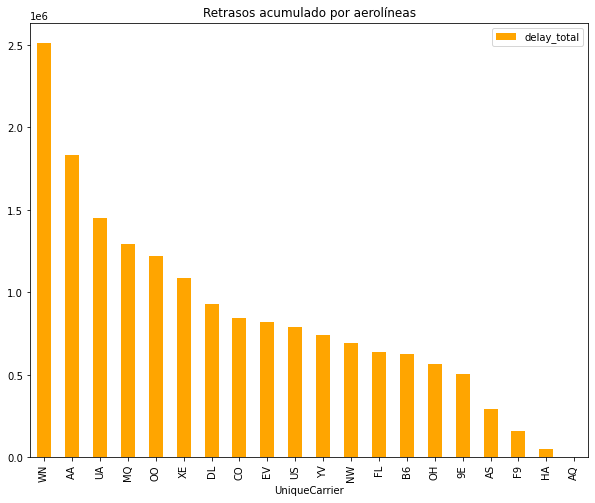

In [59]:
group=df[['UniqueCarrier','delay_total']].groupby('UniqueCarrier').sum().sort_values(by='delay_total'
                                                                ,ascending=False)

group.plot(kind='bar',color='orange',figsize=(10,8))
plt.title('Retrasos acumulado por aerolíneas');

* La aerolínea con más retrasos acumulados es [WN Southwest Airlines](https://airlinecodes.info/WN).  

5. Cuáles son los vuelos más largos? Y los más atrasados? Buscque las rutas más largas y las que acumulan más retrasos.

####  Vuelos más largos

In [99]:
df[['Origin','Dest','Distance']].sort_values(by=['Distance'],
                                             ascending=False).drop_duplicates(subset='Distance').head(10)

,Origin,Dest,Distance
1519768,HNL,EWR,4962
1348388,ATL,HNL,4502
1464095,ORD,HNL,4243
1147073,KOA,ORD,4213
1147088,ORD,OGG,4184
838444,HNL,MSP,3972
1414882,IAH,HNL,3904
1502375,HNL,DFW,3784
1894374,DFW,OGG,3711
1176099,ANC,ATL,3417


* El vuelos más largo es de Newark (EWR) to Honolulu (HNL) con una distancia de 4962 miles.

#### Vuelos que acumulan más retrasos

In [100]:
df[['Origin','Dest','delay_total']].sort_values(by=['delay_total'],
                                                ascending=False).drop_duplicates(subset='delay_total').head(10)

,Origin,Dest,delay_total
1009553,LIT,DFW,3417.0
685437,MOT,MSP,3087.0
1885481,LAS,DTW,2798.0
315259,VPS,ORD,2714.0
154597,DEN,DFW,2712.0
1909103,HDN,DFW,2559.0
350073,EGE,DFW,2508.0
1901407,LAS,DFW,2465.0
325724,EGE,MSP,2428.0
1029214,DEN,DTW,2378.0


* El vuelos que acumula más minutos de retraso es el [Little Rock National Airport (Adams Field)](https://airportcodes.aero/LIT) a [Dallas-Fort Worth International Airport](https://airportcodes.aero/KDFW) con un retraso de 3417 minutos.

6. Aporte aquello que considere relevante.

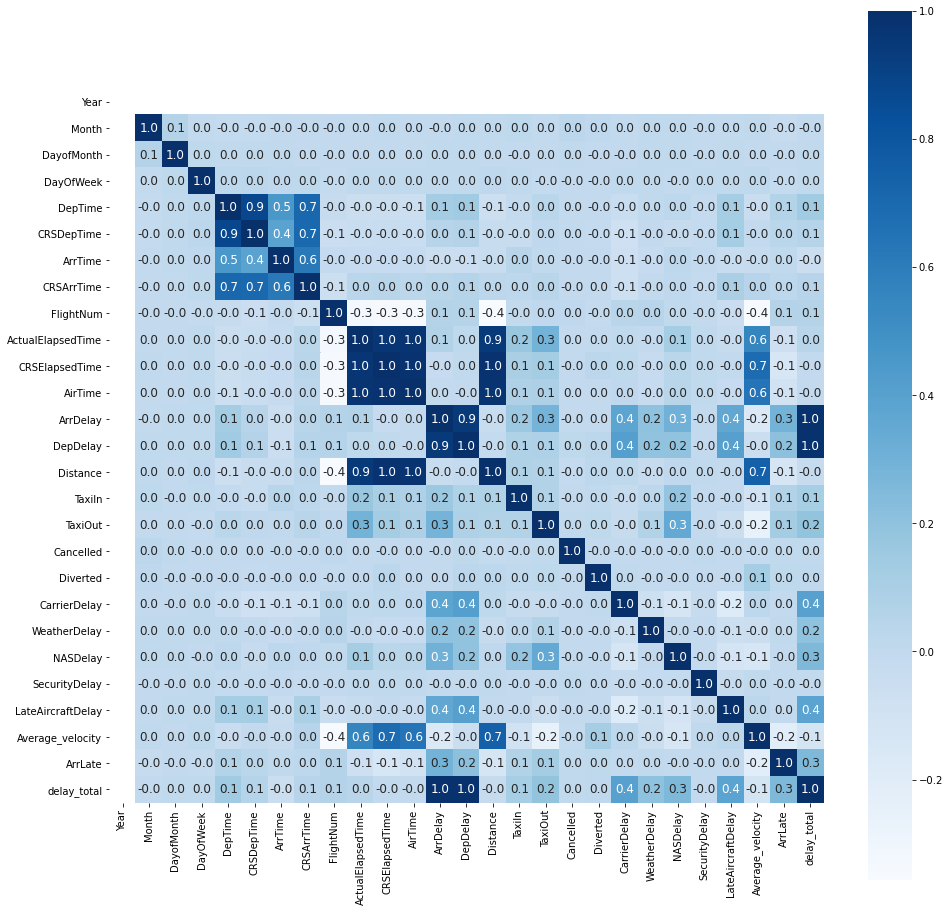

In [101]:
corr=df.corr()
plt.figure(figsize=(16,16))
sns.heatmap(corr, annot=True, cmap='Blues',annot_kws={'size':12},fmt='.1f',square=True);

De la matriz de correlaciones podemos ver que algunas variables presentan multicolinealidad, es decir, se pueden predecirse linealmente a partir de las demás. Esto es mejor para realizar un mejor análisis y trabajar con un conjunto de datos más ligero, vamos a eliminar algunas de esas variables no deseadas.

<h4 style='color:red'>¿Qué es la multicolinealidad?</h4>
La multicolinealidad ocurre cuando las variables independientes (predictores) en un modelo de regresión están correlacionadas. 

Las variables independientes deberían ser eso, independientes. Y esto se debe a que si el grado de correlación entre las variables independientes es alto, no podremos aislar la relación entre cada variable independiente y la variable dependiente (respuesta). 

<h4 style='color:red'>Variables altamente correlacionadas</h4>

* CRSDepTime (hora de salida programada) y DepTime (hora de salida)

* Distance (distancia), ActualElapsedTime (tiempo real de vuelo), CRSElapsedTime (tiempo de vuelo programado) y AirTime (tiempo de vuelo)

* delay_total (retraso total), ArrDelay (retraso llegada) y DepDelay (retraso salida)

Para evitar conflictos a la hora de realizar una futura regressión vamos a evitar esta multicolinealidad, eliminando algunas columnas

In [102]:
list_drop=['DepTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay']
df.drop(list_drop,axis=1,inplace=True)

* Unificamos las tres columnas **Year**, **Month** y **DayofMonth** en una sola columnna llamada **Date** de la siguiente manera:

In [103]:
df['Date']=df[['Year','Month','DayofMonth']].apply(lambda x: '{}-{}-{}'.format(x[0], x[1], x[2]), axis=1)
df['Date'] = pd.to_datetime(df['Date'])
df[['Date']].head(5)

,Date
262773,2008-02-10
612441,2008-04-17
589522,2008-04-18
1160489,2008-07-27
1437292,2008-09-18


* Eliminamos las columnas **Year**, **Month** y **DayofMonth**. 

In [104]:
df.drop(['Year','Month','DayofMonth'],axis=1, inplace=True)
df.head()

,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,Distance,TaxiIn,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_velocity,ArrLate,delay_total,Date
262773,7,2140,2317.0,2314,UA,898,IAD,BOS,413,6.0,...,0,28.0,0.0,0.0,0.0,0.0,272.307692,1,9.0,2008-02-10
612441,4,1346,1503.0,1435,YV,7307,ORD,BMI,116,3.0,...,0,28.0,0.0,0.0,0.0,0.0,139.200000,1,55.0,2008-04-17
589522,5,1240,1510.0,1500,WN,387,BNA,JAX,484,3.0,...,0,14.0,27.0,0.0,0.0,72.0,367.594937,1,21.0,2008-04-18
1160489,7,1904,202.0,2244,UA,1568,ORD,TPA,1012,4.0,...,0,0.0,54.0,0.0,0.0,144.0,386.751592,1,399.0,2008-07-27
1437292,4,2105,2143.0,2140,WN,496,AUS,ELP,528,4.0,...,0,14.0,27.0,3.5,0.0,72.0,355.955056,1,12.0,2008-09-18


* Reiniciar los índices

In [105]:
df.reset_index(drop=True,inplace=True)
df.head()

,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,Distance,TaxiIn,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_velocity,ArrLate,delay_total,Date
0,7,2140,2317.0,2314,UA,898,IAD,BOS,413,6.0,...,0,28.0,0.0,0.0,0.0,0.0,272.307692,1,9.0,2008-02-10
1,4,1346,1503.0,1435,YV,7307,ORD,BMI,116,3.0,...,0,28.0,0.0,0.0,0.0,0.0,139.200000,1,55.0,2008-04-17
2,5,1240,1510.0,1500,WN,387,BNA,JAX,484,3.0,...,0,14.0,27.0,0.0,0.0,72.0,367.594937,1,21.0,2008-04-18
3,7,1904,202.0,2244,UA,1568,ORD,TPA,1012,4.0,...,0,0.0,54.0,0.0,0.0,144.0,386.751592,1,399.0,2008-07-27
4,4,2105,2143.0,2140,WN,496,AUS,ELP,528,4.0,...,0,14.0,27.0,3.5,0.0,72.0,355.955056,1,12.0,2008-09-18


* Transformar valores de algunas columnas de formato **float** a **int**

In [106]:
# Crear diccionario con las varaibles en formato float para convertir a formato int.
float_to_int={'ArrTime':int,'CRSDepTime':int,'TaxiIn':int,'TaxiOut':int,
              'CarrierDelay':int,'WeatherDelay':int,'NASDelay':int,'SecurityDelay':int,
              'LateAircraftDelay':int
             }
df = df.astype(float_to_int)
df.head()

,DayOfWeek,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,Origin,Dest,Distance,TaxiIn,...,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Average_velocity,ArrLate,delay_total,Date
0,7,2140,2317,2314,UA,898,IAD,BOS,413,6,...,0,28,0,0,0,0,272.307692,1,9.0,2008-02-10
1,4,1346,1503,1435,YV,7307,ORD,BMI,116,3,...,0,28,0,0,0,0,139.200000,1,55.0,2008-04-17
2,5,1240,1510,1500,WN,387,BNA,JAX,484,3,...,0,14,27,0,0,72,367.594937,1,21.0,2008-04-18
3,7,1904,202,2244,UA,1568,ORD,TPA,1012,4,...,0,0,54,0,0,144,386.751592,1,399.0,2008-07-27
4,4,2105,2143,2140,WN,496,AUS,ELP,528,4,...,0,14,27,3,0,72,355.955056,1,12.0,2008-09-18


* Comprobar con el métod **info()** el formato de las variables.

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DayOfWeek          200000 non-null  int64         
 1   CRSDepTime         200000 non-null  int64         
 2   ArrTime            200000 non-null  int64         
 3   CRSArrTime         200000 non-null  int64         
 4   UniqueCarrier      200000 non-null  object        
 5   FlightNum          200000 non-null  int64         
 6   Origin             200000 non-null  object        
 7   Dest               200000 non-null  object        
 8   Distance           200000 non-null  int64         
 9   TaxiIn             200000 non-null  int64         
 10  TaxiOut            200000 non-null  int64         
 11  Cancelled          200000 non-null  int64         
 12  CancellationCode   200000 non-null  object        
 13  Diverted           200000 non-null  int64   

### Ejercicio 3
Exporte el dataset limpio y con las nuevas columnas a Excel.

In [108]:
df.to_excel('Flights.xlsx')